<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

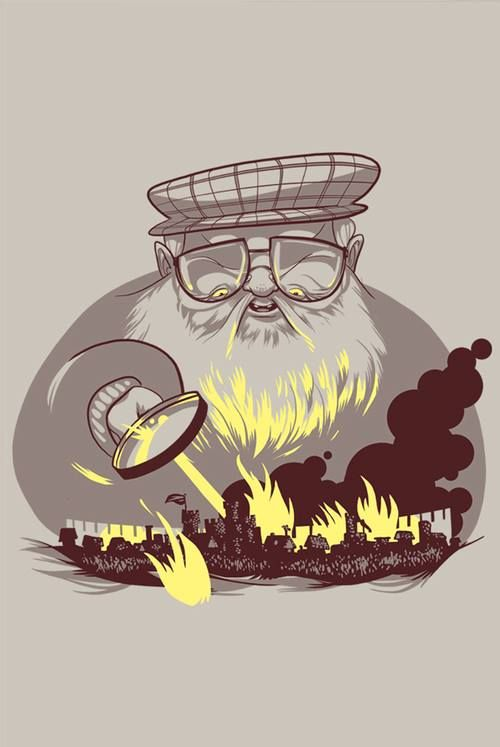

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 62.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 51.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ...

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No') # ...
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [ ]:
data_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.isna().sum()
# ...

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.drop(columns=['father', 'mother', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth', 'age'], inplace=True)
data_test.drop(columns=['father', 'mother', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth', 'age'], inplace=True)

In [ ]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,Addison Hill,Ser,1,NaN,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,1,1,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,1,0,1,1,0,0,1,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,1,1,0,0,0,0,0,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,House Seaworth,0,1,1,1,1,0,0,0,0.076923,0


In [ ]:
data_test

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,House Blackwood,0,0,0,0,1,0,0,0,0.050167
1559,Melisandre,NaN,0,Asshai,R'hllor,0,1,1,1,1,0,0,0,0.745819
1560,Merrit,NaN,0,NaN,Brotherhood without banners,0,0,1,1,0,0,0,0,0.010033
1561,Meryn Trant,Ser,1,NaN,House Trant,1,1,1,1,1,0,1,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,House Frey,1,1,1,1,1,1,0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,House Stark,1,1,1,1,1,0,0,0,0.351171
1943,Reek,NaN,1,NaN,House Bolton,0,1,0,1,1,0,0,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,1,1,1,1,1,0,0,0,0.030100


In [ ]:
data['culture'].value_counts()

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Dothraki,17
Ghiscari,17
Dornish,17
Reach,13


In [ ]:
data['title'].value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
data['isPopular'] = round(data['popularity'])
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data['culture'] = data['culture'].str.lower().replace(cult['Summer Islands'], 'Summer Islands')
data['culture'] = data['culture'].str.lower().replace(cult['Ghiscari'], 'Ghiscari')
data['culture'] = data['culture'].str.lower().replace(cult['Asshai'], 'Asshai')
data['culture'] = data['culture'].str.lower().replace(cult['Lysene'], 'Lysene')
data['culture'] = data['culture'].str.lower().replace(cult['Andal'], 'Andal')
data['culture'] = data['culture'].str.lower().replace(cult['Braavosi'], 'Braavosi')
data['culture'] = data['culture'].str.lower().replace(cult['Dornish'], 'Dornish')
data['culture'] = data['culture'].str.lower().replace(cult['Myrish'], 'Myrish')
data['culture'] = data['culture'].str.lower().replace(cult['Westermen'], 'Westermen')
data['culture'] = data['culture'].str.lower().replace(cult['Westerosi'], 'Westerosi')
data['culture'] = data['culture'].str.lower().replace(cult['Stormlander'], 'Stormlander')
data['culture'] = data['culture'].str.lower().replace(cult['Norvoshi'], 'Norvoshi')
data['culture'] = data['culture'].str.lower().replace(cult['Northmen'], 'Northmen')
data['culture'] = data['culture'].str.lower().replace(cult['Free Folk'], 'Free Folk')
data['culture'] = data['culture'].str.lower().replace(cult['Qartheen'], 'Qartheen')
data['culture'] = data['culture'].str.lower().replace(cult['Reach'], 'Reach')
data['culture'] = data['culture'].replace(['pentoshi', 'lhazareen', 'lhazarene', 'qohor', 'norvoshi', 'crannogmen',\
                                           'sistermen', 'myrish', 'andal', 'meereenese', 'lysene'], 'rare' )
data['culture'] = data['culture'].str.lower().replace(['vale mountain clans	', 'valemen', 'vale'], 'valemen')
data['culture'] = data['culture'].str.lower().replace('ironmen', 'ironborn')
data['culture'].value_counts()
# ...

,count
culture,
northmen,103
ironborn,95
free folk,56
braavosi,40
valyrian,28
dornish,21
rare,18
ghiscari,18
dothraki,17


In [ ]:
data_test['isPopular'] = round(data_test['popularity'])
data_test['boolDeadRelations'] = data_test['numDeadRelations'] > 0
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Summer Islands'], 'Summer Islands')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Ghiscari'], 'Ghiscari')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Asshai'], 'Asshai')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Lysene'], 'Lysene')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Andal'], 'Andal')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Braavosi'], 'Braavosi')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Dornish'], 'Dornish')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Myrish'], 'Myrish')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Westermen'], 'Westermen')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Westerosi'], 'Westerosi')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Stormlander'], 'Stormlander')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Norvoshi'], 'Norvoshi')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Northmen'], 'Northmen')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Free Folk'], 'Free Folk')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Qartheen'], 'Qartheen')
data_test['culture'] = data_test['culture'].str.lower().replace(cult['Reach'], 'Reach')
data_test['culture'] = data_test['culture'].replace(['pentoshi', 'lhazareen', 'lhazarene', 'qohor', 'norvoshi', 'crannogmen',\
                                           'sistermen', 'myrish', 'andal', 'meereenese', 'lysene', 'ibbenese', 'naathi',\
                                                     'rhoynar', 'meereen', 'wildlings', 'asshai'], 'rare' )
data_test['culture'] = data_test['culture'].str.lower().replace(['vale mountain clans	', 'valemen', 'vale'], 'valemen')
data_test['culture'] = data_test['culture'].str.lower().replace('ironmen', 'ironborn')
data_test['culture'] = data_test['culture'].str.lower().replace('astapor', 'astapori')
data_test['culture'] = data_test['culture'].str.lower().replace('riverlands', 'rivermen')
data_test['culture'].value_counts()
# ...

,count
culture,
northmen,30
ironborn,23
rare,22
dornish,20
valyrian,15
free folk,12
rivermen,11
valemen,9
westerosi,9


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=['name', 'house', 'title'], inplace = True)
data.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

data_test.drop(columns=['name', 'house', 'title'], inplace = True)
data_test.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            488 non-null    object 
 2   book1              1557 non-null   int64  
 3   book2              1557 non-null   int64  
 4   book3              1557 non-null   int64  
 5   book4              1557 non-null   int64  
 6   book5              1557 non-null   int64  
 7   isMarried          1557 non-null   int64  
 8   isNoble            1557 non-null   int64  
 9   isAlive            1557 non-null   int64  
 10  isPopular          1557 non-null   float64
 11  boolDeadRelations  1557 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 158.1+ KB


In [ ]:
data.describe()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
count,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,0.138728,0.327553,0.431599,0.562620,0.330122,0.128452,0.439306,0.778420,0.017341,0.044316
std,0.491829,0.345774,0.469472,0.495458,0.496223,0.470408,0.334700,0.496462,0.415443,0.130581,0.205862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


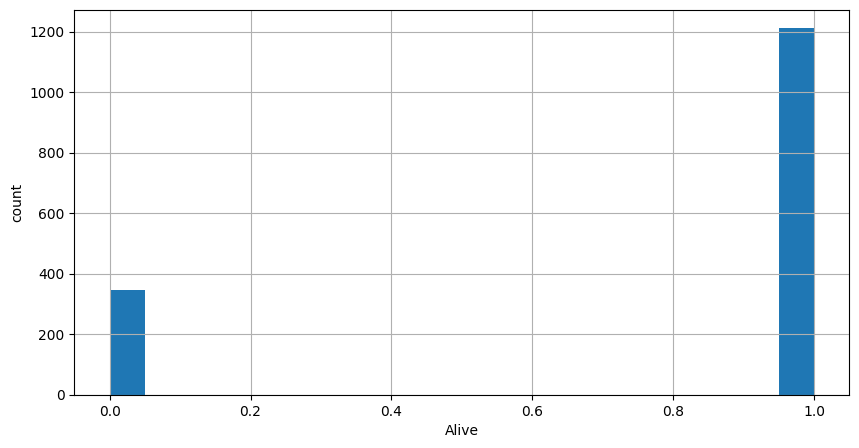

In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.show()
# ...

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,
1,1,NaN,0,0,0,0,0,0,0,0,1.0,True
2,1,rivermen,1,1,1,1,1,1,1,1,1.0,True
3,1,NaN,0,0,0,1,0,0,1,1,0.0,False
4,0,NaN,0,0,0,0,0,1,1,0,0.0,False
5,0,dornish,0,0,0,1,0,1,1,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,NaN,1,0,1,1,0,0,1,1,0.0,False
1554,0,NaN,1,1,0,0,0,0,0,0,0.0,False
1555,1,NaN,0,1,1,1,1,0,0,0,0.0,False


In [ ]:
data_test

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations
S.No,,,,,,,,,,,
1558,0,NaN,0,0,0,0,1,0,0,0.0,False
1559,0,rare,0,1,1,1,1,0,0,1.0,False
1560,0,NaN,0,0,1,1,0,0,0,0.0,False
1561,1,NaN,1,1,1,1,1,0,1,0.0,False
1562,1,rivermen,1,1,1,1,1,1,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
1942,1,westerosi,1,1,1,1,1,0,0,0.0,False
1943,1,NaN,0,1,0,1,1,0,0,0.0,False
1944,1,NaN,1,1,1,1,1,0,0,0.0,False


In [ ]:
data['boolDeadRelations'] = data['boolDeadRelations'].astype(int)
data_test['boolDeadRelations'] = data_test['boolDeadRelations'].astype(int)
# ...

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
unprocessed_cat_features = ['culture']
one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

In [ ]:
unprocessed_cat_features_test = ['culture']
one_hot_encoded_test = encoder.fit_transform(data_test[unprocessed_cat_features])
one_hot_df_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(unprocessed_cat_features_test), index=data_test.index)

In [ ]:
one_hot_df_test

,culture_astapori,culture_braavosi,culture_dornish,culture_dothraki,culture_free folk,culture_ghiscari,culture_ironborn,culture_northern mountain clans,culture_northmen,culture_qartheen,...,culture_rivermen,culture_stormlander,culture_summer islands,culture_tyroshi,culture_vale mountain clans,culture_valemen,culture_valyrian,culture_westermen,culture_westerosi,culture_nan
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
one_hot_df

,culture_astapori,culture_braavosi,culture_dornish,culture_dothraki,culture_free folk,culture_ghiscari,culture_ironborn,culture_northern mountain clans,culture_northmen,culture_qartheen,...,culture_rivermen,culture_stormlander,culture_summer islands,culture_tyroshi,culture_vale mountain clans,culture_valemen,culture_valyrian,culture_westermen,culture_westerosi,culture_nan
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
len(one_hot_df.columns)

22

In [ ]:
len(one_hot_df_test.columns)

22

In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
data_encoded

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,...,culture_rivermen,culture_stormlander,culture_summer islands,culture_tyroshi,culture_vale mountain clans,culture_valemen,culture_valyrian,culture_westermen,culture_westerosi,culture_nan
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,1,1,1,1,1,1,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,0,0,0,1,0,1,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1554,0,1,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1555,1,0,1,1,1,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded_test = pd.concat([data_test, one_hot_df_test], axis=1)

# Drop the original categorical columns
data_encoded_test = data_encoded_test.drop(unprocessed_cat_features_test, axis=1)

# Display the resulting dataframe
data_encoded_test

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,...,culture_rivermen,culture_stormlander,culture_summer islands,culture_tyroshi,culture_vale mountain clans,culture_valemen,culture_valyrian,culture_westermen,culture_westerosi,culture_nan
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1559,0,0,1,1,1,1,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,0,0,1,1,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1561,1,1,1,1,1,1,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1562,1,1,1,1,1,1,1,0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,1,1,1,1,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1943,1,0,1,0,1,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1944,1,1,1,1,1,1,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

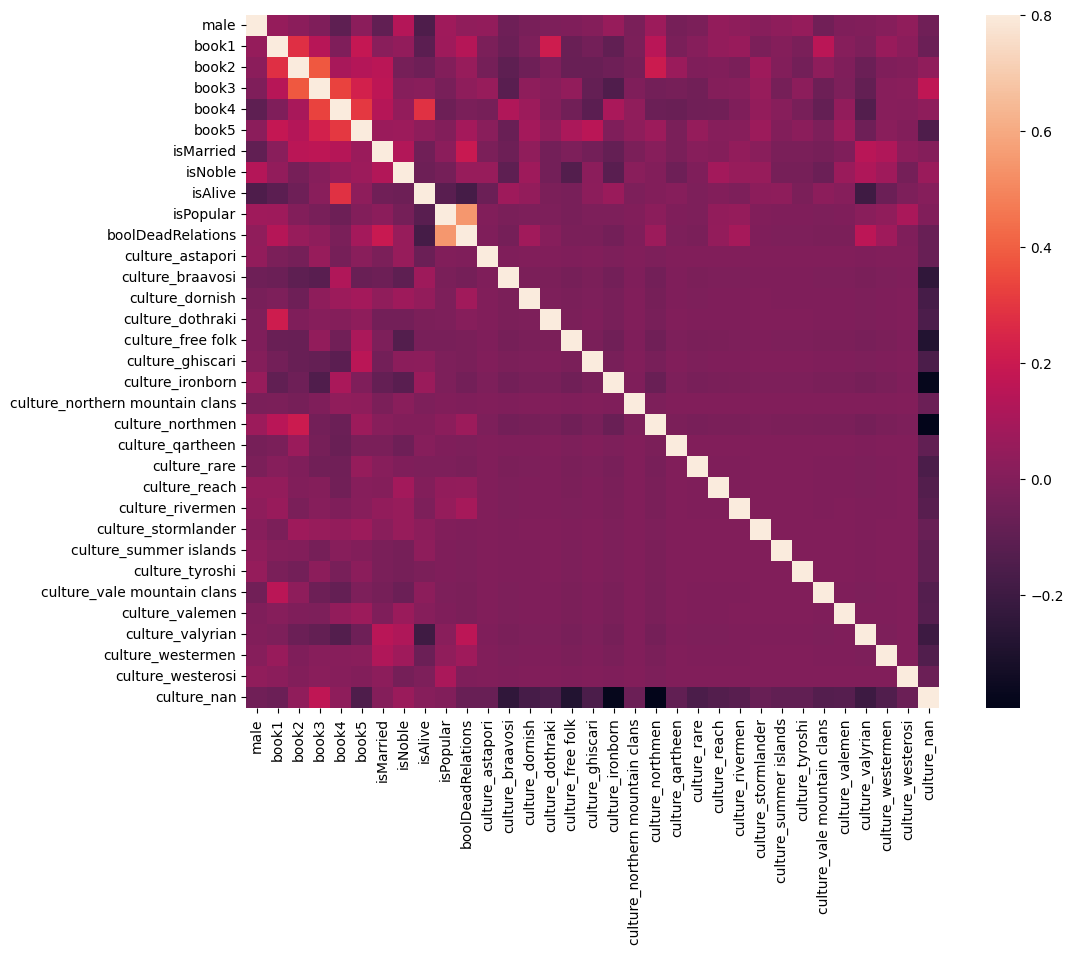

In [ ]:
corrmat = data_encoded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

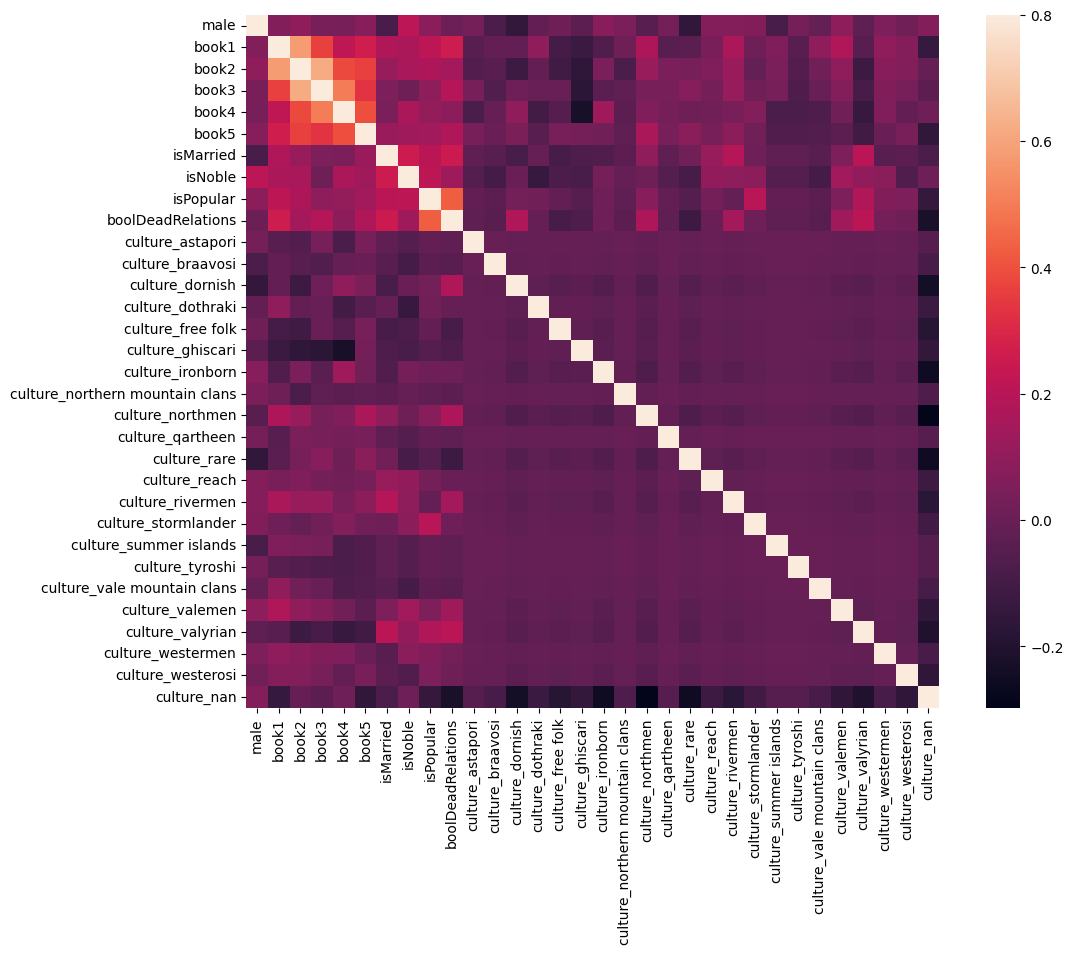

In [ ]:
corrmat = data_encoded_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_encoded.drop(['isAlive'], axis=1) # ...
y = data_encoded['isAlive'] # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44) # ...

In [ ]:
X_test2 = data_encoded_test

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
clf_ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

# Шаг 2. обучение модели
clf_ada.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_ada = clf_ada.predict(X_test)

In [ ]:
# Шаг 1. создание модели
clf_forest = RandomForestClassifier(random_state=0)
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(clf_forest, param_grid, refit=True, scoring=make_scorer(accuracy_score))

# запустим поиск
gridsearch.fit(X_train, y_train)


best_forest = gridsearch.best_estimator_

# Шаг 2. обучение модели
best_forest.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_forest = best_forest.predict(X_test)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Шаг 1. создание модели
gpc = GaussianProcessClassifier(random_state=0)

# Шаг 2. обучение модели
gpc.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_gpc = gpc.predict(X_test)

In [ ]:
# Шаг 1. создание модели
clf_gnb = GaussianNB()

# Шаг 2. обучение модели
clf_gnb.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = clf_gnb.predict(X_test)

In [ ]:
# Шаг 1. создание модели
neigh = KNeighborsClassifier(n_neighbors=5)

# Шаг 2. обучение модели
neigh.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_neigh = neigh.predict(X_test)

In [ ]:
# Шаг 1. создание модели
clf_svc = SVC(gamma='auto')
params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
gridsearch = GridSearchCV(clf_svc, params, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

best_svc = gridsearch.best_estimator_

# Шаг 2. обучение модели
best_svc.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_svc = best_svc.predict(X_test)

In [ ]:
# Шаг 1. создание модели
clf_tree = DecisionTreeClassifier(random_state=0)
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(clf_tree, param_grid, refit=True, scoring=make_scorer(accuracy_score))

# запустим поиск
gridsearch.fit(X_train, y_train)


best_tree = gridsearch.best_estimator_

# Шаг 2. обучение модели
best_tree.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_tree = best_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_gpc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.2692


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_neigh)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7885


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


In [ ]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_tree)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 12.3MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
len(data_test['culture'].unique())

22

In [ ]:
len(data['culture'].unique())

22

In [ ]:
y_pred_test = best_tree.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission['isAlive'] = y_pred_test

In [ ]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)